# Imports

In [4]:
import shutil
import pandas as pd

# Create dataset

In [15]:
df = pd.read_csv('../data/validated.tsv', delimiter='\t')
df = df[df['sentence'].str.contains(r'un|deux|trois|quatre|oui|non')]
df.head(5)

,client_id,path,sentence,up_votes,down_votes,age,gender,accent,locale,segment
2,06c9c9e703dfa759edf4836936b42a07afd1021cedb06c...,common_voice_fr_22098482.mp3,trois,2,0,NaN,NaN,NaN,fr,Benchmark
3,07a7db773acd156dd0b7fdc32f6b5eda9b32ffa1b3aee7...,common_voice_fr_21955578.mp3,quatre,6,3,NaN,NaN,NaN,fr,Benchmark
12,2404bfe8c94755dce0330d8695e5cad04222d6fb253d43...,common_voice_fr_22500710.mp3,un,2,1,NaN,NaN,NaN,fr,Benchmark
20,43c1082617d38ab8f1292edb2b5826559ba9e8b9809fc9...,common_voice_fr_21964070.mp3,non,2,1,NaN,NaN,NaN,fr,Benchmark
21,45e444eedb87053c5308862c9938b2d2769f2dc1ad1d7c...,common_voice_fr_22357111.mp3,trois,2,0,twenties,male,belgium,fr,Benchmark


In [ ]:
for index, row in df.iterrows():
    shutil.copy("../data/clips/" + row['path'], "../clips/" + row['path'])

In [16]:
df["path"] = df["path"].str.replace(".mp3", ".wav")
df = df.drop(columns=['client_id', 'up_votes', 'down_votes', 'age', 'gender', 'accent', 'locale', 'segment'])
df.to_csv('../data/data.csv', index=False)

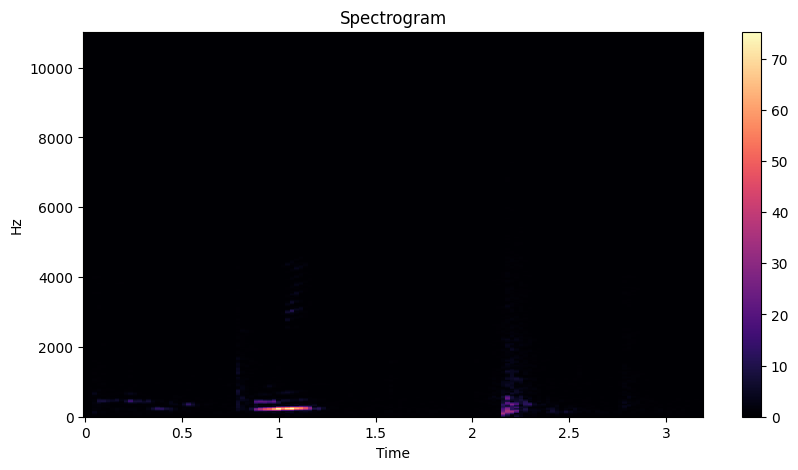

In [29]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

file = "../data/clips_wav/common_voice_fr_22068890.wav"

signal, sample_rate = librosa.load(file)

stft = librosa.stft(signal, n_fft=2048, hop_length=512, win_length=512)

# calculate abs values on complex numbers to get magnitude
spectrogram = np.abs(stft)
p_spectrogram = spectrogram ** 2

# display spectrogram
plt.figure(figsize=(10,5))
librosa.display.specshow(spectrogram, sr=sample_rate, hop_length=512, x_axis='time', y_axis='linear')
plt.colorbar()
plt.title("Spectrogram")

plt.show()


(257, 95)


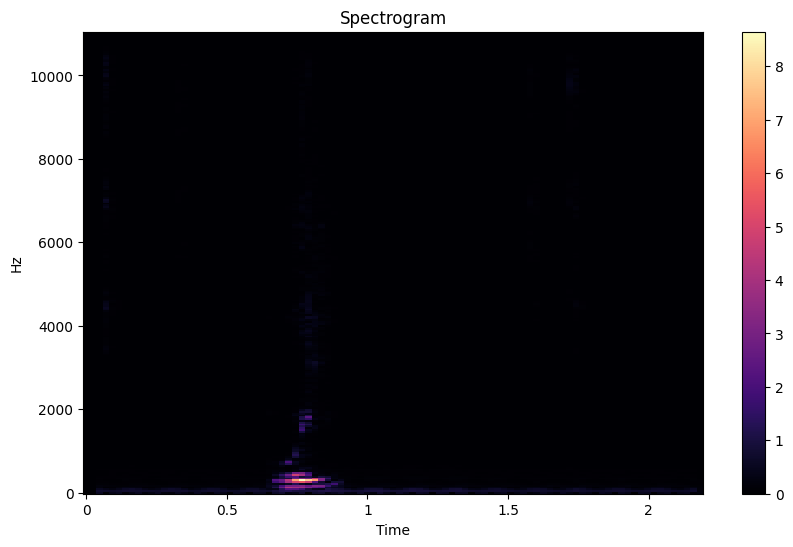

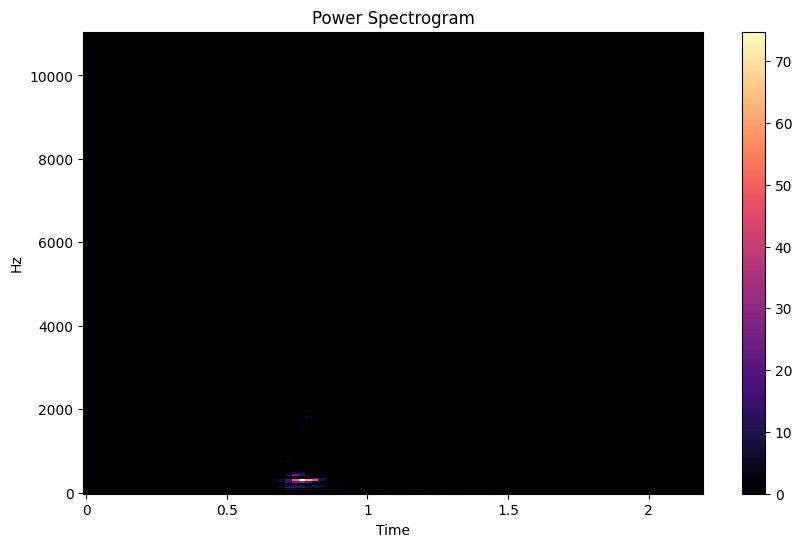

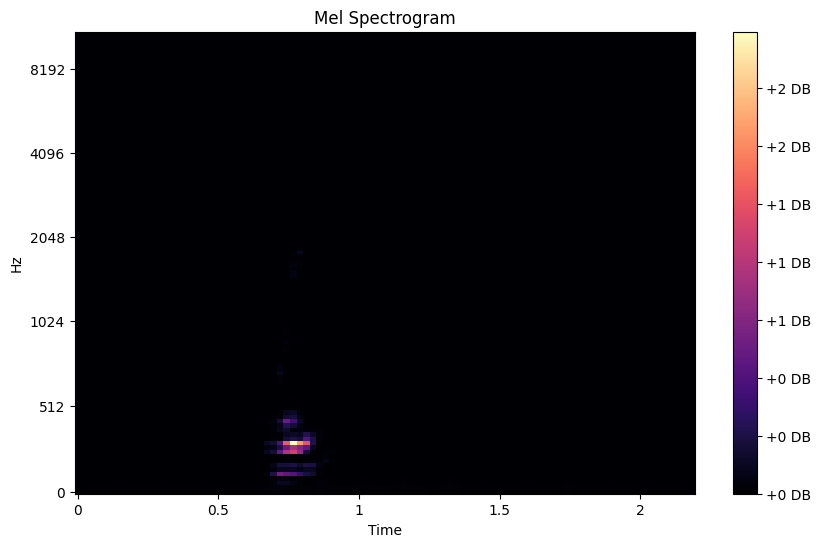

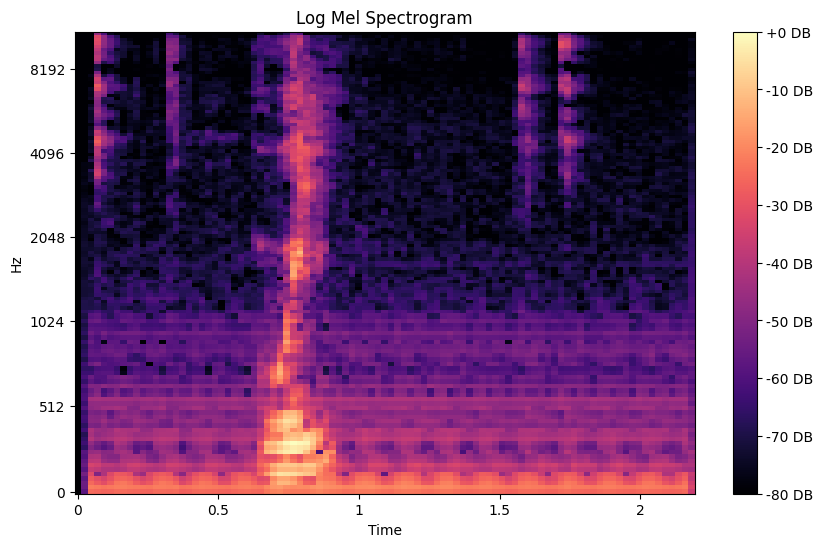

In [23]:

# STFT -> spectrogram
hop_length = 512 # in num. of samples
n_fft = 512 # window in num. of samples

# perform stft
stft = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length, win_length=n_fft)

# calculate abs values on complex numbers to get magnitude
spectrogram = np.abs(stft)
p_spectrogram = spectrogram ** 2
print(spectrogram.shape)


# display spectrogram
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(spectrogram, sr=sample_rate, hop_length=hop_length, x_axis='time', y_axis='linear')
plt.colorbar()
plt.title("Spectrogram")

# display power spectrogram
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(p_spectrogram, sr=sample_rate, hop_length=hop_length, x_axis='time', y_axis='linear')
plt.colorbar()
plt.title("Power Spectrogram")


mel_spectrogram = librosa.feature.melspectrogram(y=signal, sr=sample_rate, S=p_spectrogram, n_fft=n_fft, hop_length=hop_length, win_length=n_fft)
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(mel_spectrogram, sr=sample_rate, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f DB')
plt.title('Mel Spectrogram')


mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(mel_spectrogram_db, sr=sample_rate, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f DB')
plt.title('Log Mel Spectrogram')

plt.show()